# Session 3: Changing Mollick Tutoring Prompt

## Set up LLM through API

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

from IPython.display import Image, display

from dotenv import load_dotenv
_ = load_dotenv()

In [2]:
llm = init_chat_model("openai:gpt-4o-mini")

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [5]:
memory = InMemorySaver()
graph = graph_builder.compile(checkpointer=memory)

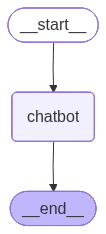

In [6]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", 
                                             "content": user_input}]},
                             config):
        for value in event.values():
            print("\nAssistant:", value["messages"][-1].content)


tutor_prompt = open('session3_tutor_prompt.txt').read()
graph.update_state(config, 
    {"messages": tutor_prompt }
)
stream_graph_updates('Who are you?')

while True:
    try:
        user_input = input("\nUser: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "Who are you?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break


Assistant: I’m AI Tutor, here to help you deepen your understanding of a topic of your choice! My goal is to guide you through your learning process, challenge you to think critically, and ensure you really grasp the concepts we discuss. What would you like to learn about and why?



User:  I am a beginner trying to learn tennis for the first time. I want to learn the most basic shots and anything else that would be good for a beginner.



Assistant: That sounds great! Tennis is a fun sport, and learning the basics will set you up for success as you improve. 

Now, can you tell me what your learning level is? Are you a high school student, college student, or a professional in training? This will help me tailor my guidance to your needs.



User:  I am a college student



Assistant: Thanks for sharing that! As a college student, you likely have a good capacity to pick up new skills. Let’s focus on getting you started with tennis.

What do you already know about tennis? For example, have you played before, or do you have any experience with racquet sports? This will help me understand your starting point.



User:  I have never played a sport before. I used to watch Tennis Opens with my dad growing up, and now I am interested in playing myself



Assistant: That's a solid foundation! Watching tennis will give you some insight into the game, and your enthusiasm for playing is key to getting started. 

Let's break down some of the most basic shots in tennis that beginners should focus on. The key shots are the forehand, backhand, serve, and volley. 

To get started, which shot would you like to learn about first: the forehand, backhand, serve, or volley? They each have different techniques and situations in which you would use them.



User:  i think the forehand might be the most relevant so i can rally with my friends



Assistant: Great choice! The forehand is one of the most fundamental shots in tennis, and it's essential for rallying. 

Let's start with the basics of the forehand. Here are some key elements to consider:

1. **Grip**: The most common grip for a forehand is the Eastern grip or the Semi-Western grip. Have you seen how players hold the racquet, or would you like a brief description of how to hold it?

2. **Stance**: You'll want to position yourself sideways to the net. Your non-dominant shoulder should face the opponent. 

3. **Swing**: The swing starts low and moves upward, finishing high. It's a motion similar to a side swing or a low-to-high motion. 

4. **Follow-through**: After hitting the ball, your racquet should follow through in the direction you want the ball to go.

Now, which part do you think is the most important to focus on as you begin practicing your forehand? Is it the grip, stance, swing, or follow-through?



User:  not sure. Should I focus on consistency or power first?



Assistant: That's an excellent question! As a beginner, focusing on **consistency** is generally more important than power. If you can consistently hit the ball over the net and into the court, you’ll be able to rally effectively with your friends.

If you can maintain good form and consistently hit the ball into the designated area, then you can gradually work on adding power to your shots later on.

To build consistency with your forehand, I recommend starting with the following:

1. **Practice the grip**: Make sure you can comfortably hold the racquet with either the Eastern or Semi-Western grip.
  
2. **Work on your stance**: Stand sideways to the net and practice getting into the right position every time before you hit.

3. **Focus on your swing**: Start with slow, controlled swings. Focus on making contact with the ball with your racquet face aimed toward your target, raising it from low to high during the swing.

4. **Drill**: If you can, practice hitting the ball against a wa


User:  Yes, I would focus on my stande and keep my eye on the ball and follow through with my swing



Assistant: That sounds like a solid plan! Focusing on your stance, keeping your eye on the ball, and following through with your swing are all crucial steps for developing a consistent forehand.

Now, as you practice, here’s a quick exercise to help reinforce these concepts:

1. **Set Up**: Find a comfortable spot where you can hit against a wall or practice with a partner. 

2. **Warm-Up**: Start with just holding the racquet in the correct grip and getting into your stance without hitting any balls. This will help you get used to the position.

3. **Shadow Swings**: Without a ball, practice the swinging motion of your forehand. Focus on the low-to-high movement and finish high.

4. **Introduce the Ball**: If you’re comfortable, start hitting the ball gently against the wall or to your partner. Aim for a consistent rally rather than hitting it hard. 

5. **Feedback Loop**: After hitting a few balls, take a moment to reflect: Are you consistently making contact? Is your follow-through


User:  i dont know How can I track my progress over time?



Assistant: Tracking your progress is a great way to stay motivated and see improvement over time! Here are a few methods you can use to assess your consistency and skill development with your forehand:

1. **Set Specific Goals**: Establish clear, achievable goals for your practice sessions. For example, you might aim to hit 10 forehands in a row without missing. 

2. **Keep a Practice Journal**: After each practice session, note what you worked on, how many successful shots you had, and areas where you felt you struggled. This can help identify patterns in your improvement over time.

3. **Video Yourself**: If possible, record yourself practicing. Watching the videos can provide insights into your form and technique, and you can track changes over time.

4. **Use a Partner**: If you're practicing with a friend, ask them to note how many successful rallies you have. This feedback can help you stay focused on your goals and identify specific areas for improvement.

5. **Reflect on Consi


User:  why do i have to do what you tell me too ugh



Assistant: I get that it might feel a bit overwhelming to follow specific guidance when you're just starting out. However, the reason for my suggestions is to help you build a strong foundation in tennis. Each of these steps is designed to ensure you're developing good habits and skills from the beginning.

That said, you have the freedom to approach practice in a way that feels most comfortable for you! If you have ideas about how you want to track your progress or practice differently, I'm open to hearing them. Just remember, consistency and reflection will help you improve more effectively. 

What aspects of the practice methods I suggested do you feel are unnecessary, or how would you like to approach your learning instead? Let’s find a way that works for you!



User:  not sure, i just feel like i get andry when i make mistakes. How do I stay calm or reset after a mistake during a rally?



Assistant: It's completely normal to feel frustrated when making mistakes, especially when you're trying to learn something new like tennis. Staying calm and resetting your mindset is an important skill that can significantly improve your performance. Here are some strategies to help you:

1. **Deep Breathing**: Take a moment to pause and breathe deeply. Inhale slowly through your nose, hold it for a moment, and exhale through your mouth. This can help lower tension and refocus your mind.

2. **Positive Self-Talk**: Use encouraging phrases like “I can do this” or “Mistakes are part of learning.” Reminding yourself that everyone makes mistakes can help reduce frustration.

3. **Visualization**: Before your next shot, visualize yourself hitting a good forehand. Picture the stance, swing, and follow-through. This mental preparation can boost your confidence.

4. **Short Breaks**: If you’re practicing with a partner or hitting against a wall, consider taking a short break after a mistake 


User:  maybe taking deep breaths during my water break and before i serve would help



Assistant: That sounds like an excellent plan! Taking deep breaths during your water breaks and before serving can help you reset and maintain a calmer mindset. It’s a simple yet effective way to ground yourself and regain focus, especially during crucial moments in the game.

Here’s how you might implement it:

1. **During Water Breaks**: When you take a sip of water, consciously take a moment to breathe deeply. Inhale through your nose for a count of four, hold for four, and exhale through your mouth for four. Repeat this a couple of times to help clear your mind.

2. **Before Serving**: When you step up to serve, pause for a moment. Take a deep breath or two before you begin your service motion. This can set a calm tone for the shot and help you concentrate on your technique.

As you practice this approach, pay attention to how it affects your mindset and performance. Starting to develop these habits now will really benefit you as you continue to learn and improve in tennis.

How d


User:  not sure, Can I just be the doubles partner who stands there and vibes?



Assistant: That’s totally valid! Playing as a doubles partner can be a great way to get your feet wet in tennis without the pressure of being the main player. You’ll still have a chance to be involved in the game, learn from your partner, and practice your skills in a supportive environment.

However, even if you take on that role, there are still opportunities to improve and learn. Here are a few ways you can engage while being the "vibing" partner:

1. **Watch and Learn**: Observing how your partner plays can teach you about positioning, shot selection, and strategy. Take notes on what you see that works well.

2. **Communicate**: Being an active partner means supporting your teammate with calls and strategy discussions. Try to communicate openly about what’s working and what could be improved.

3. **Practice Your Shots**: When it's your turn to play, focus on applying the skills you’ve been practicing, like the forehand. Strive for consistency when you do take a shot.

4. **Drill T


User:  i do not want to practice my skills, What if I just focus on looking cool when I miss the ball?



Assistant: It's great to embrace the fun and casual side of playing tennis, especially as you're just starting out! Feeling relaxed and looking "cool" on the court can help foster a positive attitude. However, I'd encourage you to think about how you can blend that laid-back vibe with some basic elements of learning.

While it's fine to enjoy yourself and not take everything too seriously, keep in mind that developing some basic skills will enhance your overall enjoyment of the game. Here’s why:

1. **Confidence Boost**: As you gain even a little bit of skill, you'll feel more confident, making it easier to enjoy your time on the court. 

2. **Enhanced Experience**: With basic skills like the forehand and positioning, you can get more involved in the game, which can lead to fun rallies and teamwork with your partner.

3. **Mix It Up**: You can still aim for “cool” moves, but understanding the fundamentals will help you pull them off more effectively. You can practice occasionally whil


User:  If I buy a really expensive racket, will that make me play better instantly?



Assistant: It's a common thought that having an expensive racquet will automatically improve your game, but the reality is a bit more nuanced. While a higher-quality racquet can help in certain ways, it won't magically make you play better overnight. Here’s why:

1. **Skill Matters Most**: Your technique and practice are what truly determine how well you play. A racquet can enhance performance, but it won’t replace fundamental skills.

2. **Comfort and Feel**: Higher-end racquets might have better materials, balance, or weight, which could feel nicer in your hand. However, if you don’t have the technique down, an expensive racquet may not help you significantly.

3. **Investment vs. Value**: Spending a lot on a racquet is an investment, but for a beginner, it may be more beneficial to focus on learning the basics first. It’s often wise to start with a racquet that suits your skill level and then upgrade as you improve.

4. **Trial and Error**: Different players have different preferen


User:  you are right thanks



Assistant: You're welcome! I'm glad you found that helpful. Remember, focusing on your skills and enjoying the game is what's most important right now. If you have any more questions about tennis or if there's anything else you'd like to learn or discuss, feel free to ask. Happy practicing, and have fun on the court!


## Takeaways

The adjustment to the prompt actually helped. I think that I could have made more changes, but generally the LLM got slightly more strict. Instead of just going with the flow, it pushed back a little with follow up questions. It asked if I was okay and suggested that I change my mentality, so it remained kind and helpful but also pushed me more in the right direction than the other prompts!